# One link calculation

We can try to calculate some coordinates based on the input angles:

In [1]:
%matplotlib inline
from sympy import cos, sin, atan, pi
from ipywidgets import interact, interactive
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np
from math import *


In [2]:
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

1.4142135623730951
1.4142135623730951
2.0 x +  -1 y +  -3.0
x=2.2, y=1.4


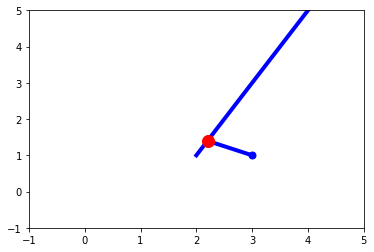

In [3]:
class Point:
        def __init__(self,):
            self.x = 0
            self.y = 0

        def __init__(self,initx,inity):
            self.x = initx
            self.y = inity
            
        def getX(self):
            return self.x
        
        def getY(self):
            return self.y
        
        def __str__(self):
            return "x=" + str(self.x) + ", y=" + str(self.y)

        def distance(p0,p1):
            dx =p0.x - p1.x
            dy = p0.y - p1.y
            return sqrt(dx*dx + dy*dy)
        
        def distanceTo(self,pt):
            return Point.distance(self,pt)
        
        
        # from two points
        # ax + by + c = 0
        def line_as_aXbYc(p1,p2):
            dx = p1.x - p2.x
            dy = p1.y - p2.y
            # y = ax + c
            a = dy / dx
            c = -((a*p2.x)-p2.y)
            # y = ax + c <=> ax + by + c = 0
            # ax + by + c = 0 => b = -1
            b=-1
            return a,b,c

        #https://en.wikipedia.org/wiki/Distance_from_a_point_to_a_line#Line_defined_by_an_equation
        def closestPointInLine(self,i,j):
            x = self.x
            y = self.y
            a,b,c = Point.line_as_aXbYc(i,j)
            r = Point(0,0) # r means return
            
            q = a*a + b*b
            r.x = (b * ( b*x-a*y) - a*c) / q
            r.y = (a * (-b*x+a*y) - b*c) / q
            
            return r
            
            
p0 = Point(0,0)
p1 = Point(1,1)

print(p0.distanceTo(p1))
print(sqrt(2))


p0 = Point(2,1)
p1 = Point(5,7)

va, vb, vc = Point.line_as_aXbYc(p0,p1)

print(va,"x + ",vb,"y + ",vc)

p2 = Point(3,1)
near = p2.closestPointInLine(p0,p1);
print(near)

plt.xlim(-1,5)    
plt.ylim(-1,5)

plt.plot([p0.x,p1.x], [p0.y ,p1.y], color="blue", lw=4, aa=True)
plt.plot([p2.x,near.x], [p2.y ,near.y], color="blue", lw=4, aa=True)

plt.plot(p2.x,p2.y, 'bo', markersize=7)
plt.plot(near.x,near.y, 'ro', markersize=12)

plt.show()

In [4]:
class TwoArms:
    def __init__(self,width1,width2,a1,a2,s1=0.1,s2=0.1):
        self.angle1 = a1
        self.angle2 = a2
        self.width1 = width1
        self.width2 = width2
        self.step_a1 = s1
        self.step_a2 = s2
        self.start_angle1 = a1
        self.start_angle2 = a2
        
    def step(self,r1,r2):
        self.angle1 += r1
        self.angle2 += r2

    def line1x(self,):
        return [0,cos(self.angle1)*self.width1]

    def line1y(self,):
        return [0,sin(self.angle1)*self.width1]

    def line2x(self,):
        t = self.line1x()[1]
        return [t,t+cos(self.angle2)*self.width2]

    def line2y(self,):
        t = self.line1y()[1]
        return [t,t+sin(self.angle2)*self.width2]

    def px(self,):
        return self.line2x()[1]

    def py(self,):
        return self.line2y()[1]
    
    def p(self,):
        return Point(self.px(),self.py())

    def pathTo(self,goalx,goaly,line=None):
        pathx = []
        pathy = []
        pathx.append(self.px());
        pathy.append(self.py());
        nstep = self.nextStepTowards(goalx,goaly)
        while not (nstep[0] == nstep[1] and nstep[0] == 0): #while the best solution is not to stay still
            self.step(nstep[0],nstep[1])
            nstep = self.nextStepTowards(goal[0],goal[1])
            pathx.append(self.px());
            pathy.append(self.py());
            #print(self.distanceToXY(goal[0],goal[1]) , "\t (a1,a2) -> " , nstep[0] ,", ", nstep[1])
        if line is not None:
            line.set_data(pathx,pathy);	
        return len(pathx)

    def populateLines(self,l1,l2):
        l1.set_data(self.line1x(),self.line1y())
        l2.set_data(self.line2x(),self.line2y())

    def distanceToXY(self,tx,ty):
        return self.p().distanceTo(Point(tx,ty));

    def distanceWithAngles(self,tx,ty,a1,a2):
        cx = cos(a1)*self.width1 + cos(a2)*self.width2
        cy = sin(a1)*self.width1 + sin(a2)*self.width2
        dx = tx - cx
        dy = ty - cy
        return sqrt(dx*dx+dy*dy)

    def distance_to_line(self,a1,a2,lx1,ly1,lx2,ly2):
        x_diff = l2x - l1x
        y_diff = l2y - l1y
        x = cos(a1)*self.width1 + cos(a2)*self.width2
        y = sin(a1)*self.width1 + sin(a2)*self.width2
        num = abs(y_diff*x - x_diff*y + l2x*l1y - l2y*l1x)
        den = math.sqrt(y_diff**2 + x_diff**2)
        return num / den
        
    def fitness(self,tx,ty,a1,a2):
        x2 = cos(a1+self.angle1)*self.width1 + cos(a2+self.angle2)*self.width2
        y2 = sin(a1+self.angle1)*self.width1 + sin(a2+self.angle2)*self.width2
        
        evaluated = Point(x2,y2)
        target = Point(tx,ty)
        near = evaluated.closestPointInLine(self.p(),target)
        
        d1 = Point.distance(evaluated,near)
        d2 = Point.distance(near,target)
   #     return Point.distance(evaluated,target)
        return d1*2 + d2

    def nextStepTowards(self,tx,ty):
        i0 = 0
        i1 = self.step_a1
        i2 = -self.step_a2
        j0 = 0
        j1 = self.step_a2
        j2 = -self.step_a2

        
        options = []
        for t1 in range(-10,10):
            for t2 in range(-10,10):
                if t1 != 0 or t2 != 0:
                        options.append([t1*self.step_a1,t2*self.step_a2])
        
#        options = [
##                    #[i0,j0],
#                    [i0,j1],
#                    [i0,j2],
#                    [i1,j0],
#                    [i1,j1],
#                    [i1,j2],
#                    [i2,j0],
#                    [i2,j1],
#                    [i2,j2],
#                   ]

        best_option = [i0,j0]
        best_distance = self.fitness(tx,ty,best_option[0],best_option[1])
        for action in options:
            c_dist = self.fitness(tx,ty,action[0],action[1])
            if c_dist < best_distance:
                best_distance = c_dist
                best_option = action
                #print("\t tested distance " , best_distance)
        #print("expected distance " , best_distance)
        return best_option

        

arm = TwoArms(10,5,0,0)
goal = [5,5]
nstep = arm.nextStepTowards(goal[0],goal[1])

while not (nstep[0] == nstep[1] and nstep[0] == 0): #while the best solution is not to stay still
    arm.step(nstep[0],nstep[1])
    nstep = arm.nextStepTowards(goal[0],goal[1])
    #print("arm", arm.distanceWithAngles(goal[0],goal[1],arm.angle1,arm.angle2))
    print(arm.distanceToXY(goal[0],goal[1]) , "\t (a1,a2) -> " , nstep[0] ,", ", nstep[1])

print("---------");
arm = TwoArms(10,5,0,0,0.1,0.1)


l = arm.pathTo(5,5)
print("path has ", l, " steps")

4.151600832308268 	 (a1,a2) ->  0.4 ,  -0.1
0.18838517322313472 	 (a1,a2) ->  0 ,  0
---------
path has  3  steps


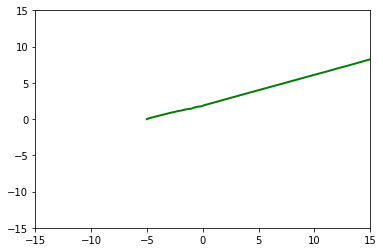

In [10]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -15, 15))
ax.set_ylim((-15, 15))

line, = ax.plot([], [], lw=2, color="blue")
line2, = ax.plot([], [], lw=2, color="red")
guide, = ax.plot([], [], lw=2, color="yellow")
pathline, = ax.plot([], [], lw=2, color="green")

width = 10;
width2 =10;
#63.68395
step = 1/(64 * 63.68395);
#step = 0.02
goal = [-5,0]

tarm = TwoArms(width,width2,1,0,step,step)
tarm2 = TwoArms(width,width2,1,0,step, step)
path_length = tarm.pathTo(goal[0],goal[1],pathline) #this changes internal variables

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line2.set_data([], [])
    guide.set_data([tarm2.p().x,goal[0]],[tarm2.p().y,goal[1]])

    print("End of init")
    return (line,line2,guide,pathline)


def animate(i):
    nstep = tarm2.nextStepTowards(goal[0],goal[1])
    tarm2.step(nstep[0],nstep[1])
    tarm2.populateLines(line,line2)
    #print(nstep[0],nstep[1])

    #pathline.set_data()
    return (line,line2,guide,pathline)

In [11]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=path_length, interval=10, blit=True)
print(path_length)

anim

End of init
1739
End of init


Note, if it fails below
Open an Anaconda shell and type: 
 > conda install -c conda-forge ffmpeg